<a href="https://colab.research.google.com/github/PJL-Emily/ethnicity-classification-by-name/blob/main/calculateCDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
%cd /content/drive/Shareddrives/weilao_research/yelp

Mounted at /content/drive
/content/drive/Shareddrives/weilao_research/yelp


In [ ]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import math as m
from statsmodels.distributions.empirical_distribution import ECDF

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def CalculateSuspiciousScore(data, high_degs, low_degs):
  ecdfs = {}
  feats = {}
  columns = data.columns
  for c in range(data.shape[1]):
    feat_name = columns[c]
    feats[feat_name] = data[feat_name].tolist()  
    ecdfs[feat_name] = ECDF(feats[feat_name])
    # ecdfs.append(ECDF(feat))
  
  S = {}
  for r in tqdm(range(data.shape[0])):
    sqrSum = 0

    for c in range(data.shape[1]):
      feat_name = columns[c]
      feat = feats[feat_name]
      if feat_name in high_degs:
        sqrSum += (1-ecdfs[feat_name](feat[r]))**2
      elif feat_name in low_degs:
        sqrSum += (ecdfs[feat_name](feat[r]))**2
    
    # if r % 10000 == 0:
    #   print(sqrSum)
    S[data.index[r]] = 1 - m.sqrt(sqrSum/data.shape[1])
  
  return pd.DataFrame(S.values(), index=S.keys(), columns=["Suspicious score"]), ecdfs

In [ ]:
user = pd.read_csv("user_behv_features.csv", index_col="Unnamed: 0").drop(["TR", "posR", "negR"], axis = 1)
prod = pd.read_csv("prod_behv_features.csv", index_col="Unnamed: 0").drop(["TR", "posR", "negR"], axis = 1)
high_degs = ["MNR", "PR", "NR", "avgRD", "WRD", "BST", "ACS", "MCS", "RD", "EXT", "DEV", "ETF", "ISR", "PCW", "PC", "RES", "SW", "F"]
low_degs = ["ERD", "ETG", "RL", "Rank", "L", "PPE", "OW", "DLu", "DLb"]


MNR


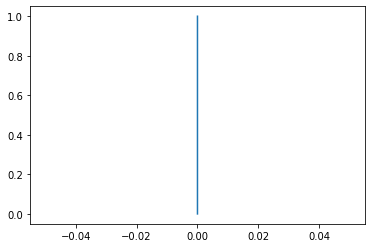

PR


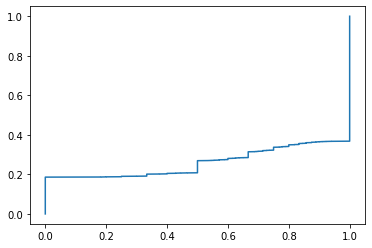

NR


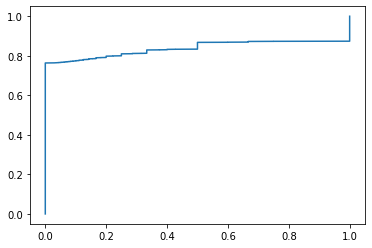

avgRD


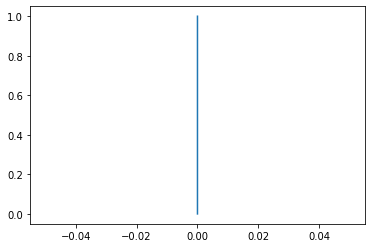

WRD


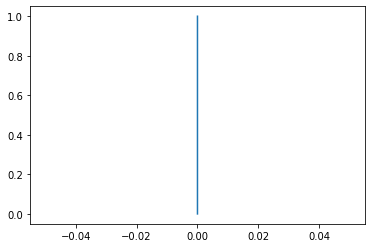

BST


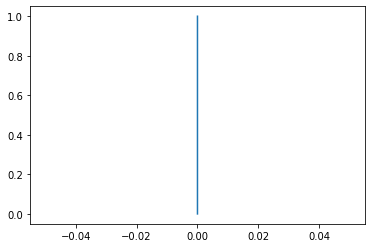

ERD


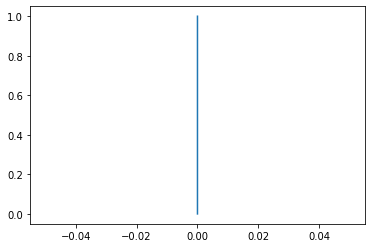

ETG


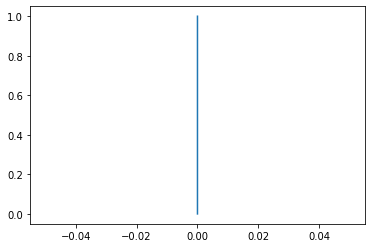

In [ ]:
userDf, userEcdfs= CalculateSuspiciousScore(user, high_degs, low_degs)
for c in user.columns:
  print(c)
  plt.plot(userEcdfs[c].x, userEcdfs[c].y)
  plt.show()


MNR


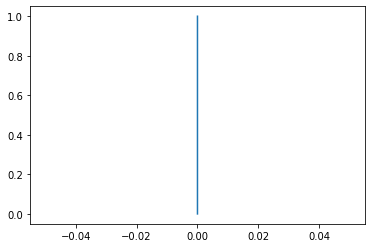

PR


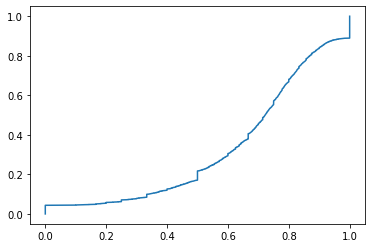

NR


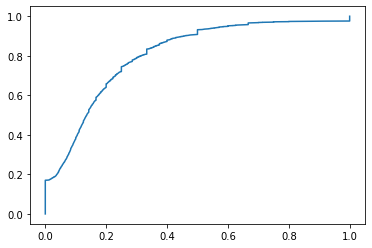

avgRD


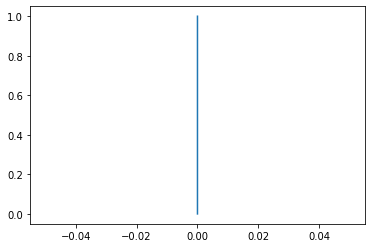

ERD


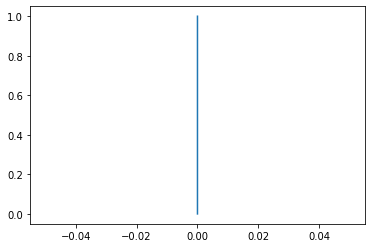

ETG


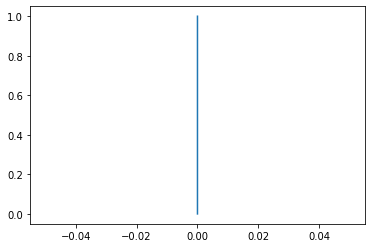

In [ ]:
prodDf, prodEcdfs= CalculateSuspiciousScore(prod, high_degs, low_degs)
for c in prod.columns:
  print(c)
  plt.plot(prodEcdfs[c].x, prodEcdfs[c].y)
  plt.show()